In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #visualization
%matplotlib inline
import seaborn as sns #visualization
np.random.RandomState(42)
import warnings
warnings.filterwarnings('ignore')

In [2]:
housing = pd.read_csv('Hands-on ML/housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()
#total_bedooms 207 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002316F3A8D88>,
      dtype=object)

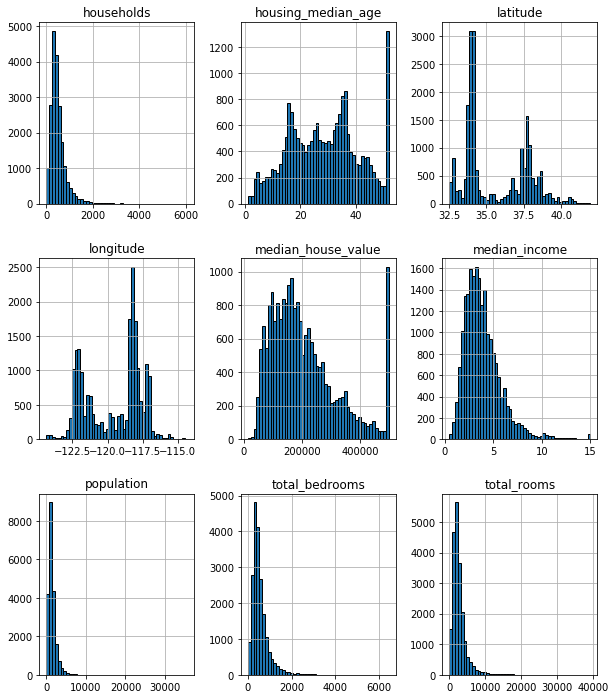

In [8]:
housing.hist(edgecolor='black', bins = 50,figsize = (10,12))

In [3]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(housing,test_size = 0.2, random_state = 42)

In [4]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0,1.5,3.0,4.5,6.0,np.inf],
                              labels = [1,2,3,4,5])

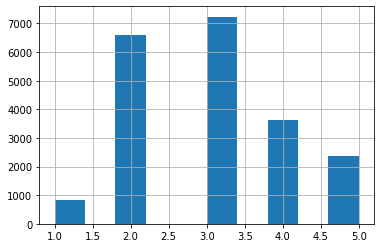

In [5]:
housing['income_cat'].hist()

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]

In [7]:
strat_test['income_cat'].value_counts()/len(strat_test)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [8]:
for set_ in (strat_train,strat_test):
    set_.drop('income_cat',axis = 1,inplace = True)

In [9]:
housing = strat_train.copy()

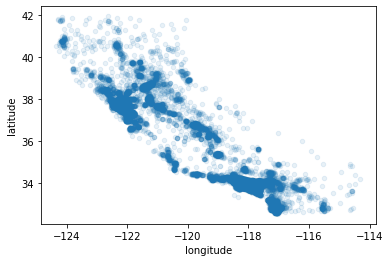

In [32]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

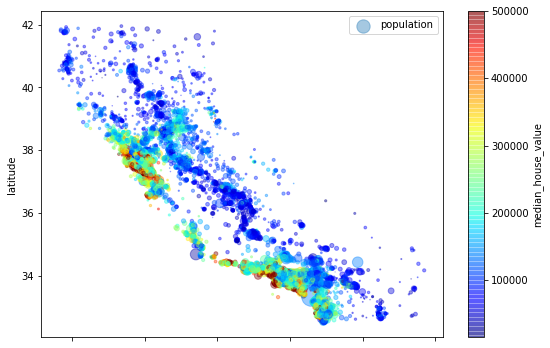

In [36]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
            s = housing['population']/100, label = 'population', figsize = (9,6),
            c = 'median_house_value', cmap=plt.get_cmap('jet'), colorbar = True)


In [10]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231711AEA88>,
      dtype=object)

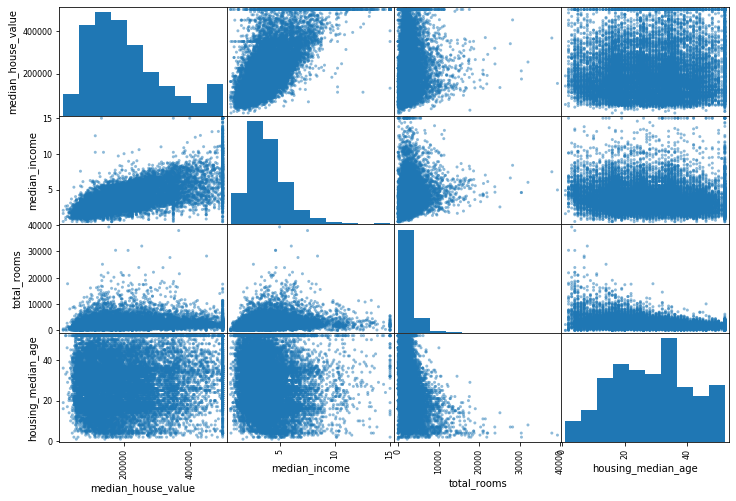

In [47]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize = (12,8))

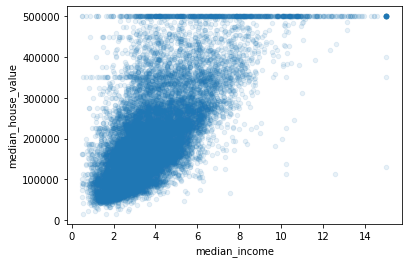

In [49]:
housing.plot(kind = 'scatter',x = 'median_income',y = 'median_house_value',alpha = 0.1)

In [11]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [12]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [13]:
housing = strat_train.drop('median_house_value',axis = 1)

In [65]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [14]:
housing_labels = strat_train['median_house_value'].copy()

In [15]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace = True)

In [73]:
housing['total_bedrooms'].isna().value_counts()

False    16512
Name: total_bedrooms, dtype: int64

In [16]:
#above to fillna with median

#OR SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis = 1)

In [77]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [17]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [18]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [19]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [20]:
X = imputer.transform(housing_num)

In [21]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [22]:
housing_cat = housing[['ocean_proximity']]
housing['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [95]:
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [23]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [24]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [25]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [26]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [29]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
predictions = lin_reg.predict(some_data_prepared)
print("Predictions:", predictions)
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [33]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared,housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69711.94118905, 69562.20559603, 71690.51060127, 70137.75485432,
       70772.32279513, 75243.34940285, 72186.24429864, 71589.39959426,
       76329.26853237, 70426.03218104])

In [38]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print('Standard Deviation', scores.std())

display_scores(tree_rmse_scores)

Scores: [69711.94118905 69562.20559603 71690.51060127 70137.75485432
 70772.32279513 75243.34940285 72186.24429864 71589.39959426
 76329.26853237 70426.03218104]
Mean 71764.90290449551
Standard Deviation 2182.6318041895784


In [39]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean 69052.46136345083
Standard Deviation 2731.6740017983493


In [40]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(housing_prepared,housing_labels)
predictions = rf_reg.predict(housing_prepared)
rf_mse = mean_squared_error(housing_labels,predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse


22550.561710049125

In [41]:
scores = cross_val_score(rf_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error',cv = 10)
rf_rmse_scores = np.sqrt(-scores)
display_scores(rf_rmse_scores)

Scores: [51967.82047058 50129.591718   52316.60993067 54911.54960652
 52980.48168533 56178.42751847 52031.40739549 50340.65405955
 55194.65959545 53004.16535683]
Mean 52905.53673368889
Standard Deviation 1904.365303557321


In [42]:
from sklearn.svm import SVR
svr = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr.fit(housing_prepared,housing_labels)
predictions = svr.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels,predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse


118580.68301157994

In [43]:
svr_scores = cross_val_score(svr, housing_prepared,housing_labels, scoring = 'neg_mean_squared_error', cv = 5)
svr_rmse_scores = np.sqrt(-svr_scores)

In [44]:
display_scores(svr_rmse_scores)

Scores: [115480.65178857 118667.36212113 120054.17974149 119616.06146406
 119284.03553803]
Mean 118620.45813065572
Standard Deviation 1633.8728518819944


In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [200,400], 'max_features': [7,10,13]},
    {'bootstrap': [False], 'n_estimators': [200,400], 'max_features':[7,10,13,16]},
]

rf_reg = RandomForestRegressor(random_state = 42)
grid_search = GridSearchCV(rf_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error', 
                          return_train_score = True)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [7, 10, 13],
   

In [61]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 7, 'n_estimators': 400}

In [62]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [63]:
cvresults = grid_search.cv_results_
for mean_score, params in zip(cvresults['mean_test_score'], cvresults['params']):
    print(np.sqrt(-mean_score),params)

49103.981989687956 {'max_features': 7, 'n_estimators': 200}
48972.94545477369 {'max_features': 7, 'n_estimators': 400}
49440.28324720437 {'max_features': 10, 'n_estimators': 200}
49340.07424425394 {'max_features': 10, 'n_estimators': 400}
49848.339487248806 {'max_features': 13, 'n_estimators': 200}
49747.05009693531 {'max_features': 13, 'n_estimators': 400}
48379.04516553952 {'bootstrap': False, 'max_features': 7, 'n_estimators': 200}
48359.16774675173 {'bootstrap': False, 'max_features': 7, 'n_estimators': 400}
49173.19979753962 {'bootstrap': False, 'max_features': 10, 'n_estimators': 200}
49093.19119096452 {'bootstrap': False, 'max_features': 10, 'n_estimators': 400}
51491.08422768182 {'bootstrap': False, 'max_features': 13, 'n_estimators': 200}
51367.453014636696 {'bootstrap': False, 'max_features': 13, 'n_estimators': 400}
68608.15035766571 {'bootstrap': False, 'max_features': 16, 'n_estimators': 200}
68629.14195690383 {'bootstrap': False, 'max_features': 16, 'n_estimators': 400}


In [64]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.71814265e-02, 6.94885474e-02, 4.18102876e-02, 1.57400561e-02,
       1.46822438e-02, 1.54171281e-02, 1.44710446e-02, 3.43860851e-01,
       5.58323024e-02, 1.10109731e-01, 6.84259758e-02, 8.69709955e-03,
       1.57794326e-01, 7.01053141e-05, 2.70380827e-03, 3.71506648e-03])

In [65]:
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse = True)

[(0.3438608507109463, 'median_income'),
 (0.15779432612953798, 'INLAND'),
 (0.1101097312852611, 'pop_per_hhold'),
 (0.07718142645031967, 'longitude'),
 (0.06948854742870723, 'latitude'),
 (0.0684259757687768, 'bedrooms_per_room'),
 (0.055832302356676515, 'rooms_per_hhold'),
 (0.04181028763986895, 'housing_median_age'),
 (0.015740056088629398, 'total_rooms'),
 (0.015417128118836667, 'population'),
 (0.01468224384699159, 'total_bedrooms'),
 (0.014471044558951344, 'households'),
 (0.008697099550296282, '<1H OCEAN'),
 (0.0037150664840080285, 'NEAR OCEAN'),
 (0.0027038082681194674, 'NEAR BAY'),
 (7.010531407264264e-05, 'ISLAND')]

In [68]:
final_model = grid_search.best_estimator_

X_test = strat_test.drop('median_house_value', axis = 1)
y_test = strat_test['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

46259.17303019679

In [69]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                        loc=squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([44254.63325576, 48180.38619888])